# (Loan amounts correlations with other attributes)
## by (Yasser Hamamy)

## Investigation Overview

> Finding out the best-fit prediction for Loan amounts and the correlations between other attributes.

## Dataset Overview

> The dataset consisted of 113,937 loans. The is a lots of attributes such as  original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, also there is many features such as borrower's employment status, current loan status.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df_copy = df.copy()

## Creating a list of intrest column 
interest_columns = ['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate','ProsperRating (Alpha)','Occupation','ListingCategory (numeric)', 'BorrowerState','EmploymentStatus','IsBorrowerHomeowner','IncomeRange','StatedMonthlyIncome','LoanOriginalAmount','LoanOriginationDate', 'Investors']
loan_data = df_copy[interest_columns]

#removing Null values from ProsperRating and Occupation.
loan_data = loan_data.dropna(subset=['ProsperRating (Alpha)'])
loan_data = loan_data.dropna(subset=['Occupation'])

#Convert LoanOriginationDate to datetime datatype.
loan_data['LoanOriginationDate'] = pd.to_datetime(loan_data['LoanOriginationDate'])
loan_data.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),Occupation,ListingCategory (numeric),BorrowerState,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,Investors
1,36,Current,0.12016,0.0920,A,Professional,2,CO,Employed,False,"$50,000-74,999",6125.000000,10000,2014-03-03,1
3,36,Current,0.12528,0.0974,A,Skilled Labor,16,GA,Employed,True,"$25,000-49,999",2875.000000,10000,2012-11-01,158
4,36,Current,0.24614,0.2085,D,Executive,2,MN,Employed,True,"$100,000+",9583.333333,15000,2013-09-20,20
5,60,Current,0.15425,0.1314,B,Professional,1,NM,Employed,True,"$100,000+",8333.333333,15000,2013-12-24,1
6,36,Current,0.31032,0.2712,E,Sales - Retail,1,KS,Employed,False,"$25,000-49,999",2083.333333,3000,2013-04-18,1


## (Loan Original amount Distribution)

> We can observe from the large spikes that most of the loans are multiples of 5K.

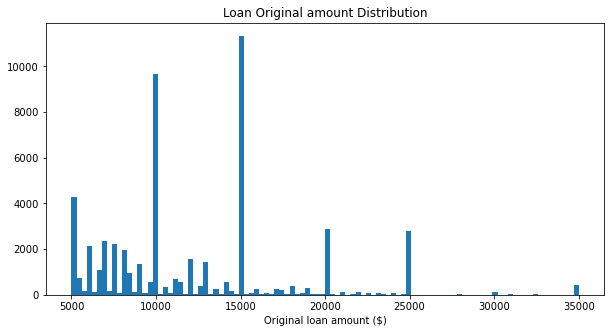

In [3]:
#Plotting loan amount Distribution
bin = np.arange(5000, loan_data.LoanOriginalAmount.max()+300, 300)
plt.figure(figsize=[10, 5])
plt.hist(data = loan_data,  x='LoanOriginalAmount', bins = bin);
plt.xlabel('Original loan amount ($)');
plt.title('Loan Original amount Distribution');

## (Income Range vs Loan Amount and Term)

There is a positive correlation between income ranges, Loan amount and loan terms as the income range increased the loan amount and loan terms also increased except for the amount $0, as it might be missing data.

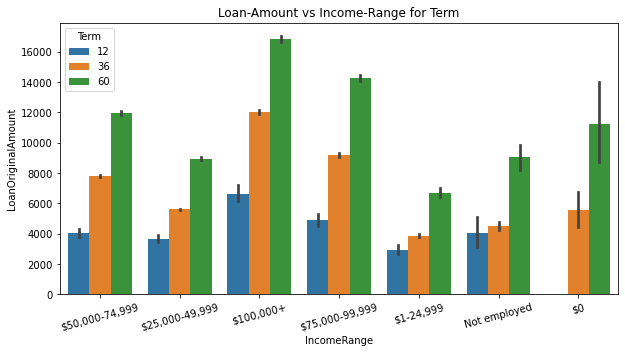

In [4]:
plt.figure(figsize=[10,5])
sb.barplot(data = loan_data, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'Term');
plt.xticks(rotation = 15);
plt.title('Loan-Amount vs Income-Range for Term');

## (Loan Amount vs Employment Status)

The highest borrowers Employment Status from the loan amount are the `Employed`

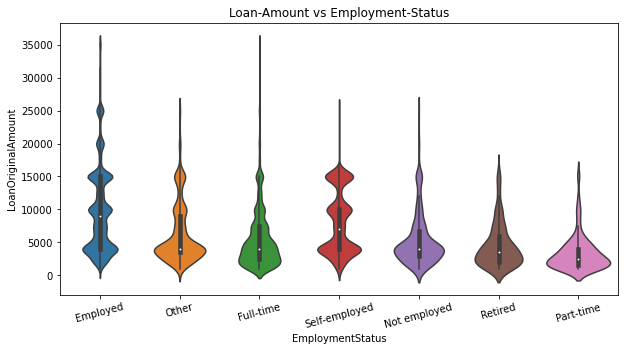

In [5]:
plt.figure(figsize=[10,5])
sb.violinplot(data = loan_data, x = 'EmploymentStatus', y='LoanOriginalAmount')
plt.xticks(rotation=15)
plt.title('Loan-Amount vs Employment-Status');

## (Employment Status vs Term)

>It appears that the `3-Year` term is the most preferable term among the Employment Status

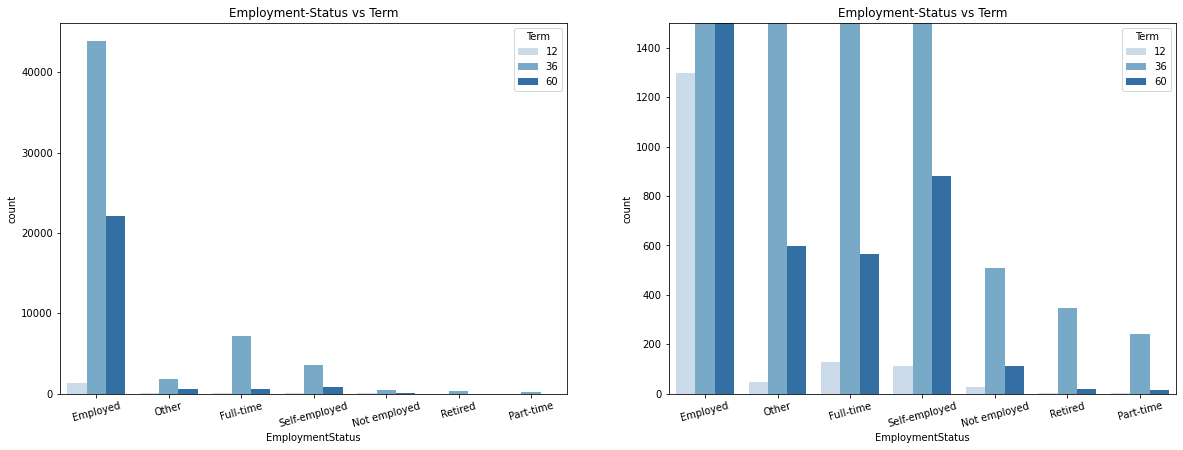

In [6]:
plt.figure(figsize=[20,15]);

plt.subplot(2, 2, 1)
sb.countplot(data = loan_data, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=15)
plt.title('Employment-Status vs Term');

plt.subplot(2, 2, 2)
sb.countplot(data = loan_data, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=15)
plt.ylim(0,1500,150)
plt.title('Employment-Status vs Term'); 

## Conclusion

>`Employed` who represent the highest share in loans amount prefer mid loan's term which is mostly the multiples of 5K.